In [2]:
%pylab inline
import os
import random

import pandas as pd
from scipy.misc import imread

Populating the interactive namespace from numpy and matplotlib


In [3]:
root_dir = os.path.abspath('.')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
i = random.choice(train.index)
train_dir='train'
test_dir='test'
img_name = train.ID[i]
print(img_name)
img = imread(os.path.join(train_dir, img_name))

print('Age: ', train.Class[i])

17204.jpg
Age:  OLD


C:\Users\Sruthi Keerthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [5]:
from scipy.misc import imresize
temp = []
for img_name in train.ID:
    img_path = os.path.join(train_dir,img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    img = img.astype('float32') # this will help us in later stage
    temp.append(img)

train_x = np.stack(temp)

C:\Users\Sruthi Keerthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
C:\Users\Sruthi Keerthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


In [6]:
train.Class.value_counts()

MIDDLE    10804
YOUNG      6706
OLD        2396
Name: Class, dtype: int64

In [7]:
print(img.shape)

(32, 32, 3)


In [8]:
image_shape

NameError: name 'image_shape' is not defined

In [9]:
temp = []
for img_name in test.ID:
    img_path = os.path.join(test_dir, img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    temp.append(img.astype('float32'))

test_x = np.stack(temp)

C:\Users\Sruthi Keerthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
C:\Users\Sruthi Keerthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """


In [10]:
train_x = train_x / 255.
test_x = test_x / 255.

In [11]:
import keras
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

Using TensorFlow backend.


In [12]:
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3

epochs = 10
batch_size = 128

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer

In [44]:
model = Sequential([
  InputLayer(input_shape=input_num_units),
  Flatten(),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=output_num_units, activation='softmax'),
])

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               1536500   
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 1503      
Total params: 1,538,003
Trainable params: 1,538,003
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/10
19906/19906 [==============================] - 9s 456us/step - loss: 0.9025 - acc: 0.5682 1s - loss: 0.9097 
Epoch 2/10
19906/19906 [==============================] - 5s 255us/step - loss: 0.8444 - acc: 0.6083
Epoch 3/10
19906/19906 [==============================] - 5s 247us/step - loss: 0.8278 - acc: 0.6147
Epoch 4/10
19906/19906 [==============================] - 5s 243us/step - loss: 0.8156 - acc: 0.6206
Epoch 5/10
19906/19906 [==============================] - 5s 249us/step - loss: 0.8126 - acc: 0.6229 0s - loss: 0.8135 - a
Epoch 6/10
19906/19906 [==============================] - 5s 257us/step - loss: 0.7998 - acc: 0.6315
Epoch 7/10
19906/19906 [==============================] - 5s 250us/step - loss: 0.7964 - acc: 0.6347
Epoch 8/10
19906/19906 [==============================] - 5s 246us/step - loss: 0.7870 - acc: 0.6415
Epoch 9/10
19906/19906 [==============================] - 5s 246us/step - loss: 0.7797 - acc: 0.6491
Epoch 10/10
19906/19906 [=========================

3795


C:\Users\Sruthi Keerthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
C:\Users\Sruthi Keerthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """


Original: YOUNG Predicted: YOUNG


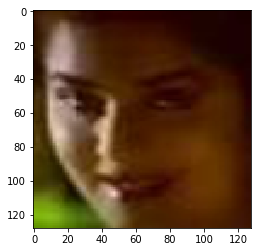

In [47]:
i = random.choice(train.index)
print(i)
img_name = train.ID[i]
img = imread(os.path.join(train_dir, img_name)).astype('float32')
imshow(imresize(img, (128, 128)))
pred = model.predict_classes(train_x)
pred=lb.inverse_transform(pred)
print('Original:', train.Class[i], 'Predicted:', pred[i])
# pred.shape

In [48]:
lb.classes_

array(['MIDDLE', 'OLD', 'YOUNG'], dtype=object)

In [49]:
pred = model.predict_classes(test_x)
pred = lb.inverse_transform(pred)

test['Class'] = pred
test.to_csv('sub02.csv', index=False)

In [50]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
img_width, img_height = 34, 34
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [42]:
# from keras.layers import Conv2D, MaxPooling2D
# from keras.layers import Activation, Dropout, Flatten, Dense
# con2d1=(30,30,50)
# model = Sequential()
# # model.add(InputLayer(input_shape=input_shape))
# model.add(Conv2D(3, (3, 3), input_shape=con2d1))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # model.add(Flatten())
# # model.add(Dense(64))
# # model.add(Activation('relu'))
# # model.add(Dropout(0.5))
# # model.add(Dense(1))
# # model.add(Activation('sigmoid'))

In [43]:
# model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 28, 28, 3)         1353      
_________________________________________________________________
activation_24 (Activation)   (None, 28, 28, 3)         0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 3)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 12, 12, 32)        896       
_________________________________________________________________
activation_25 (Activation)   (None, 12, 12, 32)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 4, 4, 64)          18496     
__________

In [51]:
# from keras.applications.vgg16 import VGG16

In [53]:
# import keras
vgg16_model = keras.applications.vgg16.VGG16()